In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
from tqdm import tqdm
import os
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, BatchNormalization, Activation, Input
from keras.models import Sequential, Model
from sklearn.metrics import confusion_matrix, classification_report
from keras import regularizers
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

warnings.filterwarnings("ignore")

In [23]:
res = 216

def load_data(directory):
    images = []
    labels = []
    for folder in tqdm(os.listdir(directory)):
        label = folder
        data_path = os.path.join(directory, folder)
        if not os.path.isdir(data_path):
            continue
        for filename in tqdm(os.listdir(data_path), position=0, leave=True, desc=f"Loading images from {directory.split(os.sep)[-2]} folder"):
            img = cv2.imread(os.path.join(data_path, filename))
            if img is None:
                continue
            img = cv2.resize(img, (res, res))
            img = np.array(img)
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)


In [24]:
x_train, y_train = load_data('chest_xray/chest_xray/train/')
x_test, y_test = load_data('chest_xray/chest_xray/test/')

100%|██████████| 3/3 [00:02<00:00,  1.37it/s]


In [25]:
y_train = np.where(y_train == 'NORMAL', 0, 1)
y_test = np.where(y_test == 'NORMAL', 0, 1)

In [26]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


# assuming you've got these 4 arrays from somewhere
# x_train, x_test, y_train, y_test
print('AHAHAHAHAHAHAAH')
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.2, shuffle = True, stratify = y_train)

# normalize the data
x_train = x_train[0 : 700] / 255.0
x_test = x_test[0 : 700] / 255.0

# convert labels to one-hot vectors
y_train = to_categorical(y_train[0 : 700])
y_test = to_categorical(y_test[0 : 700])
print('AHAHAHAHAHAHAAH')
# define the model structure
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
model = Sequential()
model.add(base_model)
model.add(Dense(y_train.shape[1], activation='softmax'))  # y_train.shape[1] is num_classes
print('BABABABABABABAABABAB')
# do not train the base model, only train the classifier layer
base_model.trainable = False

# compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train[0 : 700], y_train[0 : 700], validation_data=(x_test[0 : 700], y_test[0 : 700]), epochs=10)
print('CCCCCCCCCCCCCCCCCCCCCCCCCCCCC')
# after initial training, you may want to fine-tune the entire model with a lower learning rate
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
history_2 = model.fit(x_train[0 : 700], y_train[0 : 700], validation_data=(x_test[0 : 700], y_test[0 : 700]), epochs=4)
print('CCCCCCCCCCCCCCCCCCCCCCCCCCCCC')


AHAHAHAHAHAHAAH
AHAHAHAHAHAHAAH
BABABABABABABAABABAB
Epoch 1/10
22/22 [==============================] - 34s 2s/step - loss: 0.5793 - accuracy: 0.7329 - val_loss: 0.5569 - val_accuracy: 0.7543
Epoch 2/10
22/22 [==============================] - 32s 1s/step - loss: 0.5501 - accuracy: 0.7643 - val_loss: 0.6070 - val_accuracy: 0.7543
Epoch 3/10
22/22 [==============================] - 32s 1s/step - loss: 0.5524 - accuracy: 0.7643 - val_loss: 0.5478 - val_accuracy: 0.7543
Epoch 4/10
22/22 [==============================] - 32s 2s/step - loss: 0.5369 - accuracy: 0.7643 - val_loss: 0.5735 - val_accuracy: 0.7543
Epoch 5/10
22/22 [==============================] - 33s 2s/step - loss: 0.5343 - accuracy: 0.7643 - val_loss: 0.5350 - val_accuracy: 0.7543
Epoch 6/10
22/22 [==============================] - 32s 2s/step - loss: 0.5234 - accuracy: 0.7643 - val_loss: 0.5272 - val_accuracy: 0.7543
Epoch 7/10
22/22 [==============================] - 32s 1s/step - loss: 0.5180 - accuracy: 0.7643 - val_los

CCCCCCCCCCCCCCCCCCCCCCCCCCCCC
Epoch 1/4
22/22 [==============================] - 88s 4s/step - loss: 0.3656 - accuracy: 0.8757 - val_loss: 0.5675 - val_accuracy: 0.7543
Epoch 2/4
22/22 [==============================] - 82s 4s/step - loss: 0.0691 - accuracy: 0.9757 - val_loss: 0.5369 - val_accuracy: 0.7543
Epoch 3/4
22/22 [==============================] - 83s 4s/step - loss: 0.0207 - accuracy: 0.9986 - val_loss: 0.5825 - val_accuracy: 0.7543
Epoch 4/4
22/22 [==============================] - 83s 4s/step - loss: 0.0144 - accuracy: 1.0000 - val_loss: 0.6049 - val_accuracy: 0.7543
CCCCCCCCCCCCCCCCCCCCCCCCCCCCC


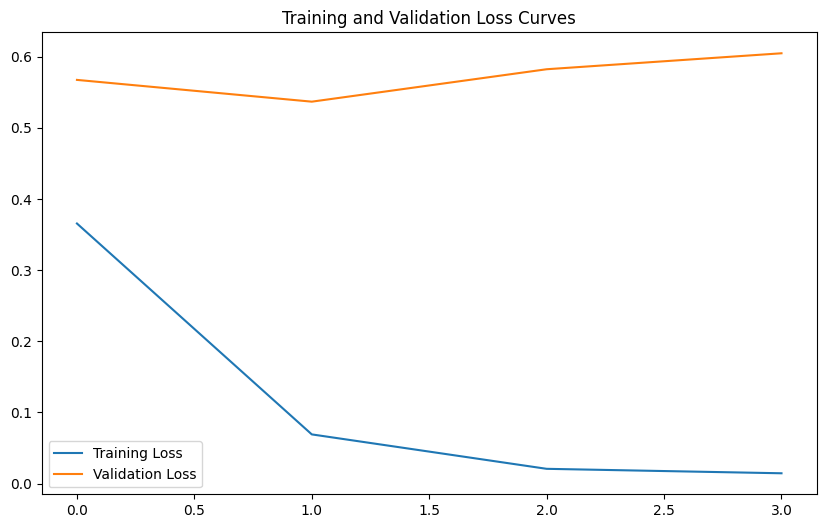

In [27]:
plt.figure(figsize=(10, 6))
plt.plot( history_2.history['loss'], label='Training Loss')
plt.plot( history_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()